In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("train.csv")
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [20]:
#remove target to perform dimenensionality reduction on X
X=df.drop(['target','id'],axis=1)
X

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21
...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53
410,1.024,5.53,577,19.7,224,0.77
411,1.018,6.28,455,22.2,270,7.68
412,1.008,7.12,325,12.6,75,1.03


In [21]:
#Perform PCA
from sklearn.decomposition import PCA

#find the number of components that can explain 95 percent of the variance
pca=PCA()
pca.fit(X)

variance=np.cumsum(pca.explained_variance_ratio_)*100
k=np.argmax(variance>99.99)
k

3

In [22]:
#centering the dataset
X=X-np.mean(X)

In [23]:
X

,gravity,ph,osmo,cond,urea,calc
0,-159.441802,-154.264802,282.545198,-145.654802,-36.454802,-159.004802
1,-159.429802,-155.054802,542.545198,-136.854802,233.545198,-156.274802
2,-159.445802,-154.324802,210.545198,-135.954802,-1.454802,-151.414802
3,-159.433802,-155.544802,281.545198,-139.654802,237.545198,-153.824802
4,-159.433802,-154.924802,713.545198,-142.654802,224.545198,-158.244802
...,...,...,...,...,...,...
409,-159.443802,-155.244802,366.545198,-139.054802,-85.454802,-158.924802
410,-159.430802,-154.924802,416.545198,-140.754802,63.545198,-159.684802
411,-159.436802,-154.174802,294.545198,-138.254802,109.545198,-152.774802
412,-159.446802,-153.334802,164.545198,-147.854802,-85.454802,-159.424802


In [26]:
#As we see , 3 principal components can explain more than 99.99 % of the variance of the dataset
p=PCA(3)

#Centerin the dataset
reduced_X=p.fit_transform(X)
reduced_X


array([[-256.44882308,  -41.08424611,   -2.60416534],
       [  98.8479402 ,   78.61373115,    2.06671991],
       [-303.96663965,   22.93078183,    9.73331402],
       ...,
       [-178.34010304,   82.80552986,    6.33312866],
       [-383.77168269,  -30.19024915,   -2.03631132],
       [-310.51710046,   26.4552301 ,   -4.86768235]])

Text(0, 0.5, 'Feature 2 ')

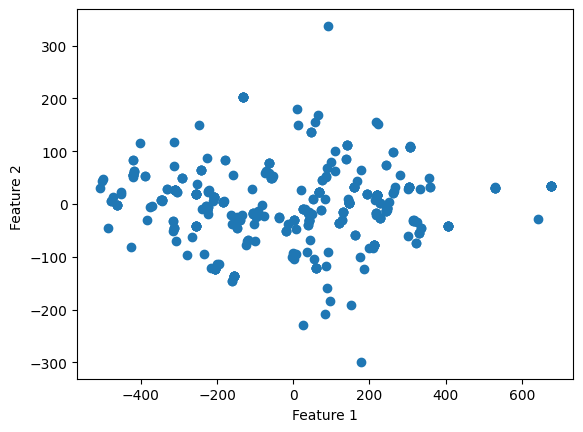

In [65]:
#plotting the relation between the 3 featues
plt.scatter(reduced_X[:,0],reduced_X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2 ")

Text(0, 0.5, 'Feature 3')

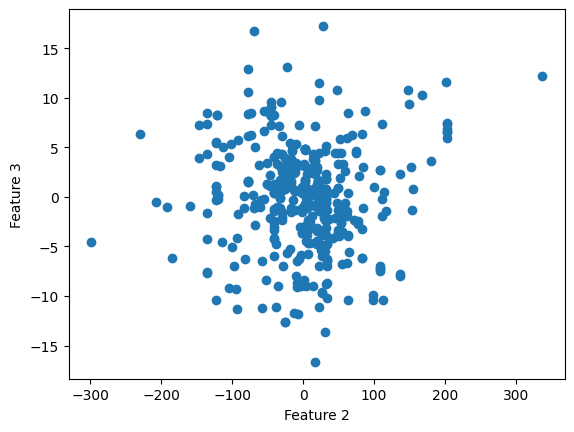

In [66]:
plt.scatter(reduced_X[:,1],reduced_X[:,2])
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

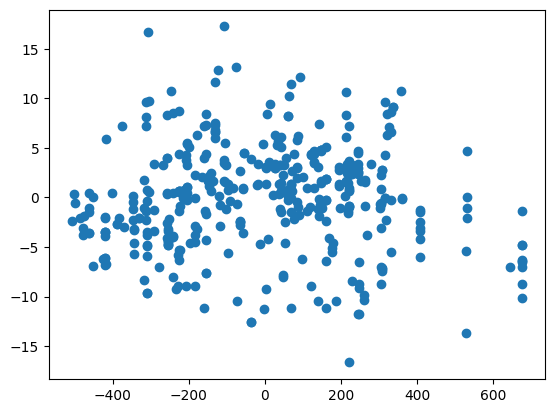

In [33]:
plt.scatter(reduced_X[:,0],reduced_X[:,2])

In [35]:
#As we can see none of the features are dependent on  each other linearly i.e independent components
#Now we can train our classifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(reduced_X,df['target'],test_size=0.20)

In [55]:
#Classifier used : SVM
from sklearn.svm import SVC
classifier=SVC(kernel='linear',gamma='auto')
classifier.fit(x_train,y_train)

SVC(gamma='auto', kernel='linear')

In [56]:
#make predictions anf calculate metrics
pred_train=classifier.predict(x_train)
pred_train

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [59]:
#metrics for training and testing
accuracy_train=classifier.score(x_train,y_train)
accuracy_test=classifier.score(x_test,y_test)
accuracy_train,accuracy_test

(0.649546827794562, 0.6265060240963856)

The Model is not overfitting, however bias is high

<Axes: >

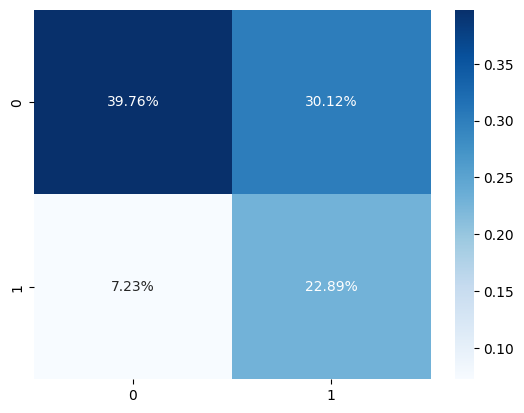

In [64]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

ytest_pred=classifier.predict(x_test)
c=confusion_matrix(y_test,ytest_pred)

sn.heatmap(c/(np.sum(c)),annot=True,fmt='0.2%',cmap='Blues')